In [1]:
import urllib.request
urllib.request.urlretrieve('http://cs.joensuu.fi/sipu/datasets/unbalance.txt', 'unbalance.txt')

('unbalance.txt', <http.client.HTTPMessage at 0x7f097c2e1da0>)

In [2]:
from pyspark import SparkContext
sc = SparkContext()

### NumPy (Numerical Python) - Basics

In [3]:
import numpy
from numpy import array

In [4]:
list_of_list = [[1,2], [4,9], [10,100]]  # list of list
# list_of_list + 1
# list_of_list * 2

# A numpy array is similar to MATLAB matrix
numpy_array = array(list_of_list)
print(numpy_array)
print('Add 1 to each element')
print(numpy_array + 1)
print('-------')
print('Multiply each element by 2')
print(numpy_array * 2)

[[  1   2]
 [  4   9]
 [ 10 100]]
Add 1 to each element
[[  2   3]
 [  5  10]
 [ 11 101]]
-------
Multiply each element by 2
[[  2   4]
 [  8  18]
 [ 20 200]]


In [5]:
print('Shape of array is ', numpy_array.shape)
print('Rank of array (matrix) is ', numpy_array.ndim)
print('Item size is ', numpy_array.dtype)
print('Reshaped Array from 3x2 into 2x3:')
print(numpy_array.reshape(2,3))

Shape of array is  (3, 2)
Rank of array (matrix) is  2
Item size is  int64
Reshaped Array from 3x2 into 2x3:
[[  1   2   4]
 [  9  10 100]]


## k-means Clustering with Mlib

https://en.wikipedia.org/wiki/K-means_clustering

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from pyspark.mllib.clustering import KMeans, KMeansModel
from math import sqrt
import numpy

In [7]:
rdd = sc.textFile('unbalance.txt')
rdd.take(5)

['151700 351102',
 '155799 354358',
 '142857 352716',
 '152726 349144',
 '151008 349692']

In [8]:
rdd_split = rdd.map(lambda line: line.split(' '))
rdd_split.take(5)

[['151700', '351102'],
 ['155799', '354358'],
 ['142857', '352716'],
 ['152726', '349144'],
 ['151008', '349692']]

In [9]:
features = rdd_split.map(lambda x: (float(x[0]), float(x[1]))).cache()  # Select only the features , convert to float
output = rdd_split.map(lambda x: int(x[2])).cache()  # Take the output

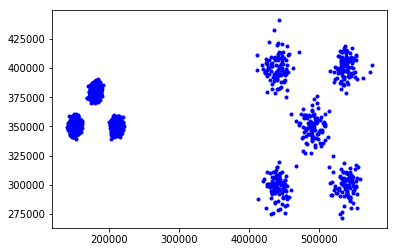

In [10]:
features_python_list = features.collect()
# Convert it to a numpy array
features_numpy_array = numpy.array(features_python_list)
# Plot the figure using matplotlib library
plt.plot(features_numpy_array[:,0], features_numpy_array[:,1], 'b.')
plt.show()

In [21]:
# Build the model (cluster the data)
cluster_model = KMeans.train(features, 8)  # intialization step is crucial in algorithms which are randomized
#cluster_model = KMeans.train(features, 8, initializationSteps=100, epsilon=1e-4)

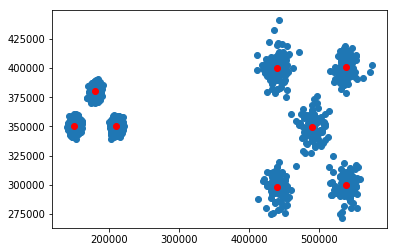

In [23]:
cluster_centers = numpy.array(cluster_model.clusterCenters)

plt.scatter(features_numpy_array[:,0], features_numpy_array[:,1]) # Plot the points first

for index in range(0,8):  # For every cluster plot the centers
    plt.scatter(cluster_centers[index,0], cluster_centers[index,1], c='r')
plt.show()

In [24]:
# predict the output labels using the model generated
predicted_labels = cluster_model.predict(features)
print(predicted_labels) # still an RDD

PythonRDD[144] at RDD at PythonRDD.scala:48


In [25]:
# Convert to numpy array
predicted_labels = numpy.array(predicted_labels.collect())

In [26]:
# take out the unique output labels from array (Hint: Use numpy unique function!)
unique_labels = numpy.unique(predicted_labels)
print(unique_labels)

[0 1 2 3 4 5 6 7]


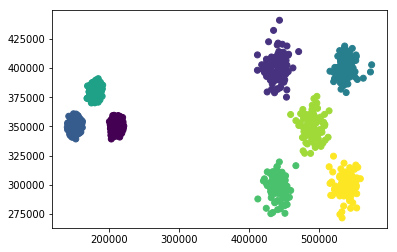

In [27]:
# Now plot the scatter plot of the points again using the command above but with colors (Hint: use the parameter c to pass color array)
plt.scatter(features_numpy_array[:,0], features_numpy_array[:,1], c=predicted_labels)